# EDA Data

In [79]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from utils.utils import clean_and_preprocess_data, categorical_columns

In [80]:
# Set display options for easier reading
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [81]:
#-----------------------------
# Load the Dataset
#-----------------------------
# Replace 'tourism_data.csv' with your actual file name or full path
df = pd.read_csv('data/Train.csv')

#-----------------------------
# Initial Inspection
#-----------------------------
print("DataFrame Shape:", df.shape)
display(df.head())        # Show first 5 rows
display(df.tail())        # Show last 5 rows
print(df.info())          # Data types and non-null counts

DataFrame Shape: (4809, 23)


,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
4804,tour_993,UAE,45-64,Alone,0.0,1.0,Business,Hunting tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,2.0,0.0,Credit Card,No,No comments,3315000.0
4805,tour_994,UNITED STATES OF AMERICA,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,11.0,0.0,Cash,Yes,Friendly People,10690875.0
4806,tour_995,NETHERLANDS,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,others,Independent,No,No,No,No,No,No,No,3.0,7.0,Cash,Yes,Good service,2246636.7
4807,tour_997,SOUTH AFRICA,25-44,Friends/Relatives,1.0,1.0,Business,Beach tourism,"Travel, agent, tour operator",Independent,Yes,Yes,Yes,No,No,No,No,5.0,0.0,Credit Card,No,Friendly People,1160250.0
4808,tour_999,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,No,4.0,7.0,Cash,Yes,Friendly People,13260000.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [82]:
#-----------------------------
# Check Missing Values
#-----------------------------
print("Missing Values per Column:")
display(df.isna().sum())

Missing Values per Column:


ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

In [83]:
#-----------------------------
# Summary Statistics for Numerical Data
#-----------------------------
display(df.describe())

,total_female,total_male,night_mainland,night_zanzibar,total_cost
count,4806.000000,4804.000000,4809.000000,4809.000000,4.809000e+03
mean,0.926758,1.009575,8.488043,2.304429,8.114389e+06
std,1.288242,1.138865,10.427624,4.227080,1.222490e+07
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06
max,49.000000,44.000000,145.000000,61.000000,9.953288e+07


**Interpretation of the Summary Statistics:**

The summary statistics for the numerical variables provide several insights into the dataset:

1. **Group Composition (`total_female`, `total_male`):**
   - **Means:** `total_female ≈ 0.93`, `total_male ≈ 1.01`
   - **Medians:** Both have a median of 1.
   - **Interpretation:** Most tourist groups are small, commonly consisting of one female and one male on average. While the majority are likely pairs or small groups, the maximum values (49 females, 44 males) indicate occasional large groups (e.g., organized tours).

2. **Length of Stay (`night_mainland`, `night_zanzibar`):**
   - **`night_mainland`:** Median = 6, Mean ≈ 8.49  
     This suggests most tourists stay about a week on the mainland. The higher mean compared to the median implies some tourists stay much longer, pulling the average up.
   - **`night_zanzibar`:** Median = 0, Mean ≈ 2.30  
     At least half of the tourists do not visit Zanzibar at all, but those who do might spend several days. The presence of outliers who stay much longer (max = 61 nights) indicates a few tourists with extended stays.
   - **Maximum Stays:** 145 nights on the mainland and 61 nights in Zanzibar indicate a small number of very long-term visitors, possibly researchers, long-term volunteers, or seasonal expatriates.

3. **Total Spending (`total_cost`):**
   - **Median `total_cost` ≈ 3,397,875 TZS, Mean ≈ 8,114,389 TZS**  
     The mean is substantially higher than the median, indicating the data is right-skewed. A minority of tourists spend significantly more than the typical tourist.
   - **Quartiles:**  
     - 25% ~ 812,175 TZS  
     - 75% ~ 9,945,000 TZS  
     This suggests a wide range of spending: while a quarter of tourists spend less than a million TZS, another quarter spends nearly 10 million TZS or more.
   - **Range:** Minimum = 49,000 TZS, Maximum ≈ 99,532,880 TZS  
     The vast maximum value highlights that some tourists (possibly large groups or luxury travelers) spend tremendously more than the average tourist.

**What We Learn:**
- **Group Size & Composition:** Typically small groups, often just a couple, but occasionally very large groups.
- **Travel Patterns:** Most stay about a week on the mainland, and many skip Zanzibar entirely. Yet, a few have very long stays, which suggests a diverse range of travel purposes and styles.
- **Spending Behavior:** Expenditure is highly skewed, with a typical tourist spending a few million TZS, but a small number spending tens of millions. This diversity suggests a diverse market, ranging from budget to high-end luxury travelers.

In essence, these statistics show a complex tourism profile, where most visitors are moderate spenders staying for about a week, while a handful push the boundaries in both spending and length of stay.

### Examine Category columns

### Why These Columns?
- **country**: Provides insights into the main source markets for tourism.
- **age_group**: Helps identify the age demographics of visitors.
- **travel_with**: Highlights whether tourists travel solo, with family, or with groups.
- **purpose**: Clarifies the primary motivations for visiting.
- **main_activity**: Shows which activities are most popular among tourists.
- **info_source**: Offers insights into effective channels for tourism marketing.
- **tour_arrangement**: Indicates whether trips are self-organized or through tour operators.
- **payment_mode**: Useful for understanding financial behavior and preferences.
- **first_trip_tz**: Provides data on repeat visitors vs. first-time tourists.

In [84]:
# List of selected columns to analyze
selected_columns = [
    'country', 'age_group', 'travel_with', 'purpose',
    'main_activity', 'info_source', 'tour_arrangement',
    'payment_mode', 'first_trip_tz'
]

# Display value counts for selected columns
for column in selected_columns:
    print(f"Value Counts for '{column}':")
    print(df[column].value_counts(dropna=False))
    print("-" * 50)

Value Counts for 'country':
country
UNITED STATES OF AMERICA    695
UNITED KINGDOM              533
ITALY                       393
FRANCE                      280
ZIMBABWE                    274
                           ... 
NIGER                         1
MYANMAR                       1
DOMINICA                      1
TUNISIA                       1
ESTONIA                       1
Name: count, Length: 105, dtype: int64
--------------------------------------------------
Value Counts for 'age_group':
age_group
25-44    2487
45-64    1391
1-24      624
65+       307
Name: count, dtype: int64
--------------------------------------------------
Value Counts for 'travel_with':
travel_with
Alone                  1265
NaN                    1114
Spouse                 1005
Friends/Relatives       895
Spouse and Children     368
Children                162
Name: count, dtype: int64
--------------------------------------------------
Value Counts for 'purpose':
purpose
Leisure and Holidays    

### 1. **Country**
- **Most common countries**: 
  - **United States of America (695)**, **United Kingdom (533)**, **Italy (393)**, and **France (280)** are the top source markets.
- **Insights**: 
  - The majority of tourists are from Western countries, suggesting Tanzania is a popular destination for international travelers.
  - Tailoring marketing campaigns for tourists from these countries could be effective.
  - The **long tail** (105 countries) indicates global interest in Tanzania as a tourism destination.
  
---

### 2. **Age Group**
- **Distribution**:
  - **25-44 years (2487)**: Largest group, likely working professionals or young families.
  - **45-64 years (1391)**: Second largest, likely retirees or mature travelers.
  - **1-24 years (624)**: Smaller group, potentially students or young backpackers.
  - **65+ years (307)**: Smallest group, likely older retirees.
- **Insights**:
  - Marketing efforts should prioritize the 25-44 and 45-64 age groups.
  - Activities and services can be tailored to these age brackets, such as family-friendly experiences or luxury tours.

---

### 3. **Travel With**
- **Distribution**:
  - **Alone (1265)**: Many tourists travel solo, possibly for business or adventure.
  - **Spouse (1005)** and **Friends/Relatives (895)**: Indicate social travel.
  - **Spouse and Children (368)**: Represents family tourism.
  - **NaN (1114)**: Missing data, which could indicate a need for better data collection.
- **Insights**:
  - Solo travelers and couples dominate, so promoting experiences catering to these groups could be impactful.
  - Family-focused activities and marketing could also attract a significant segment.

---

### 4. **Purpose**
- **Distribution**:
  - **Leisure and Holidays (2840)**: Dominates tourism, highlighting the importance of Tanzania's natural attractions.
  - **Business (671)** and **Visiting Friends and Relatives (633)**: Secondary purposes.
  - Smaller segments include **Meetings/Conference (312)**, **Volunteering (138)**, and **Other (128)**.
- **Insights**:
  - Marketing and tourism services should focus on leisure travelers while also accommodating business tourists and other niche groups.

---

### 5. **Main Activity**
- **Distribution**:
  - **Wildlife Tourism (2259)**: Most popular activity, showcasing Tanzania's rich biodiversity.
  - **Beach Tourism (1025)**: Highlights interest in coastal areas.
  - Other activities include **Hunting (457)**, **Conference (367)**, **Cultural Tourism (359)**, and **Mountain Climbing (234)**.
- **Insights**:
  - Wildlife and beach tourism are key drivers. Investments in conservation, wildlife safaris, and coastal attractions are crucial.
  - Diversifying into cultural and adventure tourism can tap into smaller yet valuable segments.

---

### 6. **Info Source**
- **Distribution**:
  - **Travel Agents/Tour Operators (1913)** and **Friends/Relatives (1635)**: Dominant sources of information.
  - Smaller sources include **Media (Radio, TV, Web - 249)** and **Tanzania Mission Abroad (68)**.
- **Insights**:
  - Strengthening partnerships with travel agents and leveraging word-of-mouth referrals are key.
  - Enhancing digital presence (media) could capture more independent travelers.

---

### 7. **Tour Arrangement**
- **Distribution**:
  - **Independent (2570)**: Majority of tourists plan their trips independently.
  - **Package Tour (2239)**: Indicates strong demand for organized travel services.
- **Insights**:
  - Offering both independent travel services and comprehensive tour packages would cater to diverse preferences.

---

### 8. **Payment Mode**
- **Distribution**:
  - **Cash (4172)**: Most common payment method, indicating a need for cash-friendly services.
  - **Credit Card (622)**: Smaller but significant segment.
  - Rare methods include **Travelers Cheque (7)**.
- **Insights**:
  - Ensuring the availability of cash payment options is crucial.
  - Expanding card payment facilities could improve convenience for international travelers.

---

### 9. **First Trip to Tanzania**
- **Distribution**:
  - **Yes (3243)**: Most tourists are visiting Tanzania for the first time.
  - **No (1566)**: Indicates a good retention rate for repeat visitors.
- **Insights**:
  - Focus on creating memorable first-time experiences to encourage repeat visits.
  - Engaging previous visitors with loyalty programs or targeted marketing could further improve retention.

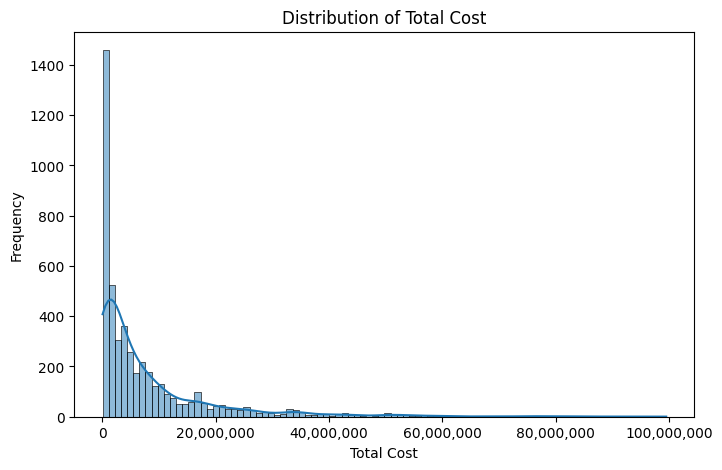

In [85]:
#-----------------------------
# Distribution of Target Variable (total_cost)
#-----------------------------
# Histogram for total_cost
plt.figure(figsize=(8,5))
sns.histplot(df['total_cost'], kde=True)
plt.title('Distribution of Total Cost')
plt.xlabel('Total Cost')
plt.ylabel('Frequency')

# Use an EngFormatter or StrMethodFormatter for more readable format
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

### Insights from the Distribution of Total Cost

1. **Skewness**:
   - The distribution is highly **right-skewed**, indicating that most tourists spend a lower amount, but a few spend significantly more, creating a long tail.

2. **Majority Spending**:
   - A large proportion of tourists have expenditures concentrated at the lower end of the cost range. This suggests that budget-friendly tourism options (e.g., economical accommodation and tours) are a significant portion of the market.

3. **High Spending Outliers**:
   - The tail of the distribution represents a smaller group of tourists with very high expenditures. These could include luxury travelers, those purchasing high-end packages, or business tourists attending conferences.

4. **Actionable Insights**:
   - **For Tourism Providers**: Focus on offering budget options to cater to the majority while maintaining premium offerings for high-spending individuals.
   - **For Further Analysis**: Investigate the characteristics of high-spending tourists (e.g., their purpose, origin, travel arrangement) to understand what drives higher costs.

5. **Potential Data Validation**:
   - Some data points might be extreme outliers or errors. Consider further analyzing or cleaning these values if necessary.


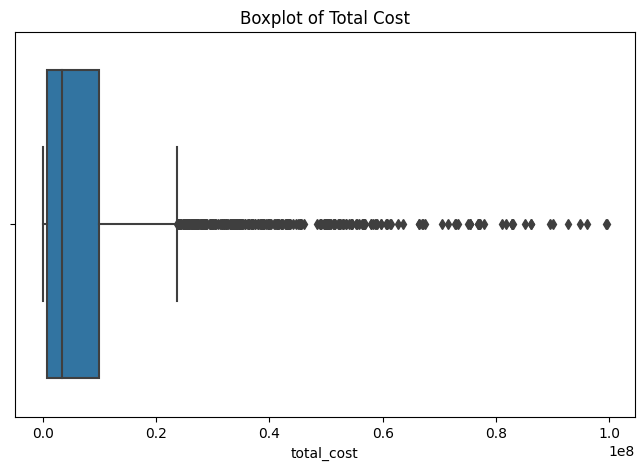

In [86]:
# Boxplot for total_cost to check for outliers
plt.figure(figsize=(8,5))
sns.boxplot(x=df['total_cost'])
plt.title('Boxplot of Total Cost')
plt.show()

### Insights from the Boxplot of Total Cost

1. **Presence of Outliers**:
   - The boxplot reveals a significant number of **outliers** on the higher end of total costs. These outliers indicate that some tourists have unusually high expenditures compared to the majority.

2. **Spread of Data**:
   - The interquartile range (IQR) is quite narrow compared to the full range of values, suggesting that most tourists' spending is concentrated within a smaller range.
   - The whiskers extend slightly beyond the IQR, showing a few values close to but not classified as outliers.

3. **High-End Expenditure**:
   - The outliers are tourists who might be availing premium services such as luxury hotels, extended stays, exclusive packages, or high-end activities. These tourists represent a lucrative segment for businesses targeting high-value clients.

4. **Actionable Insights**:
   - **For Tourism Marketers**: Consider analyzing these high-cost outliers further to understand what services or packages drive such spending. Tailor marketing campaigns for luxury travelers based on these findings.
   - **For Budget Segmentation**: Since the majority lies within the box (IQR), focus on improving services and offerings for average spenders to enhance customer satisfaction.

5. **Next Steps for Analysis**:
   - Investigate the characteristics (e.g., purpose of visit, package type, travel origin) of tourists within the outlier group.
   - Check if the extreme values are valid entries or potential data entry errors.

6. **Skewness Confirmation**:
   - The boxplot reinforces the earlier histogram's observation of a right-skewed distribution in total cost.


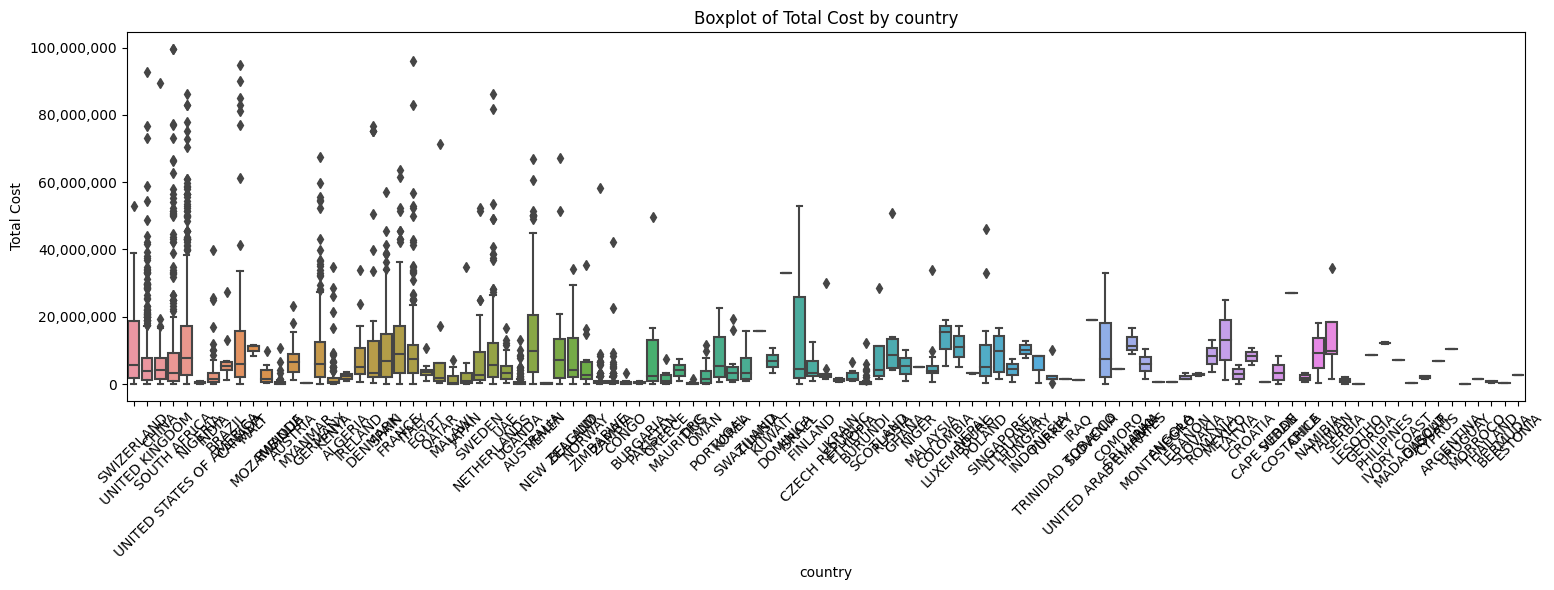

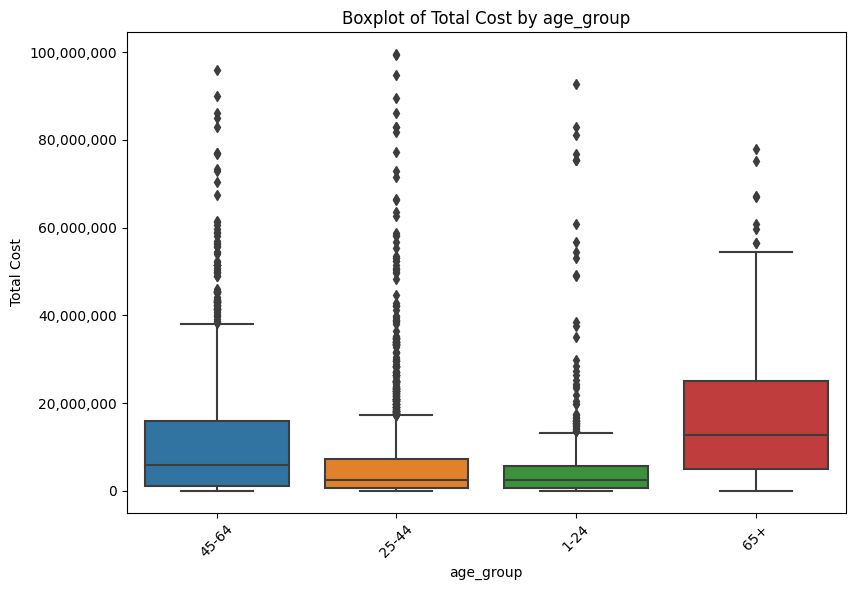

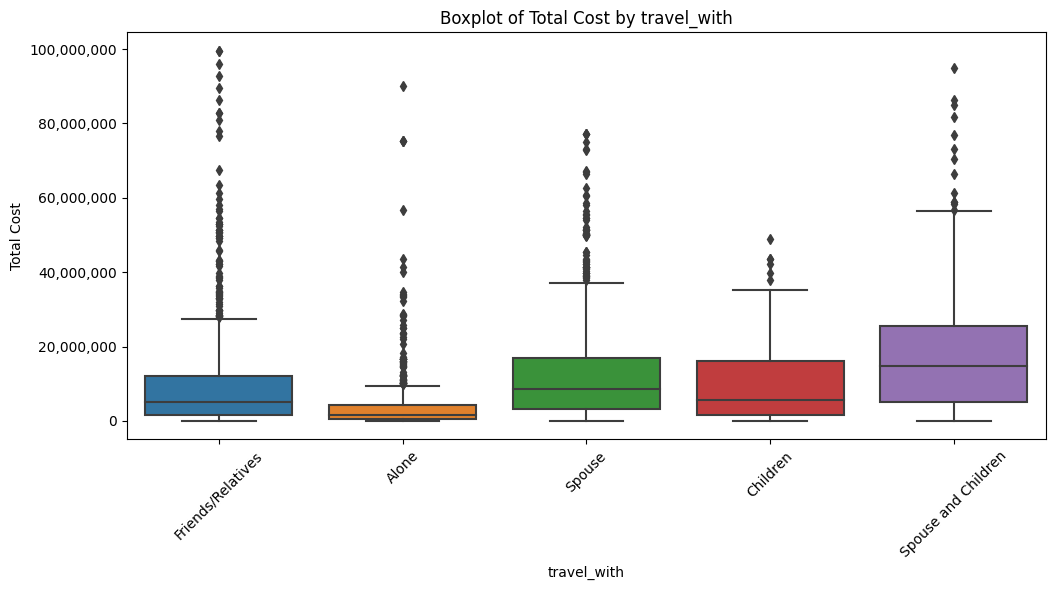

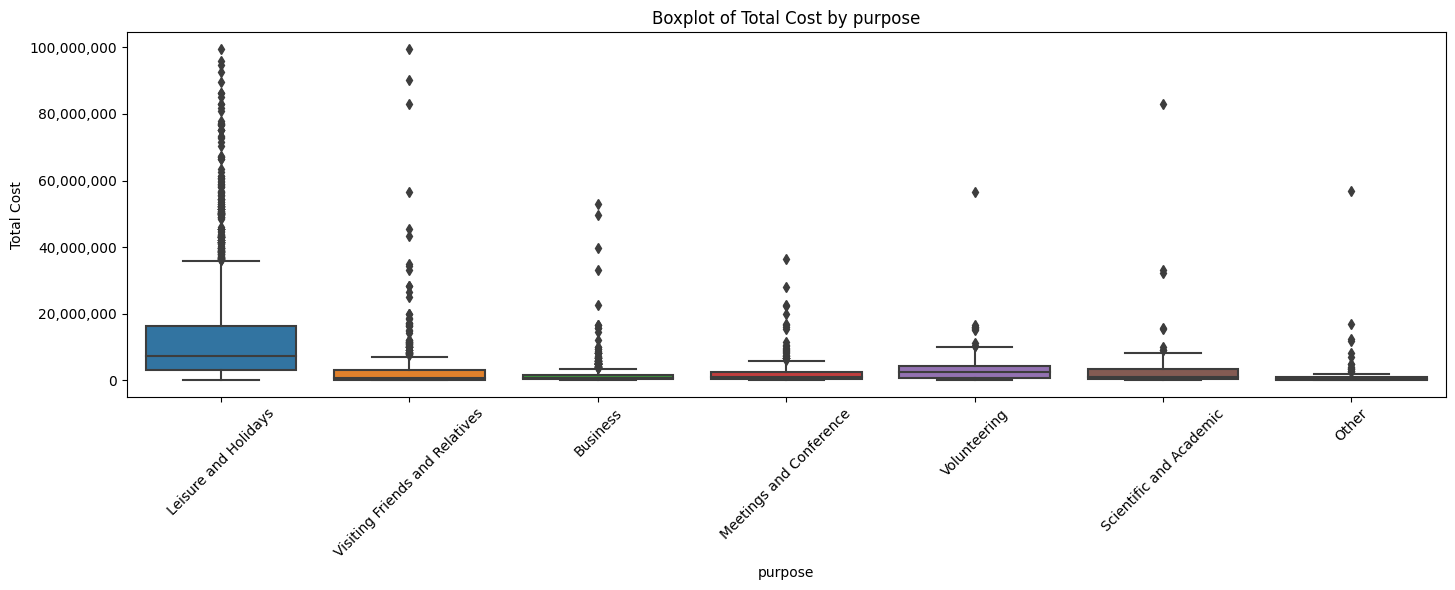

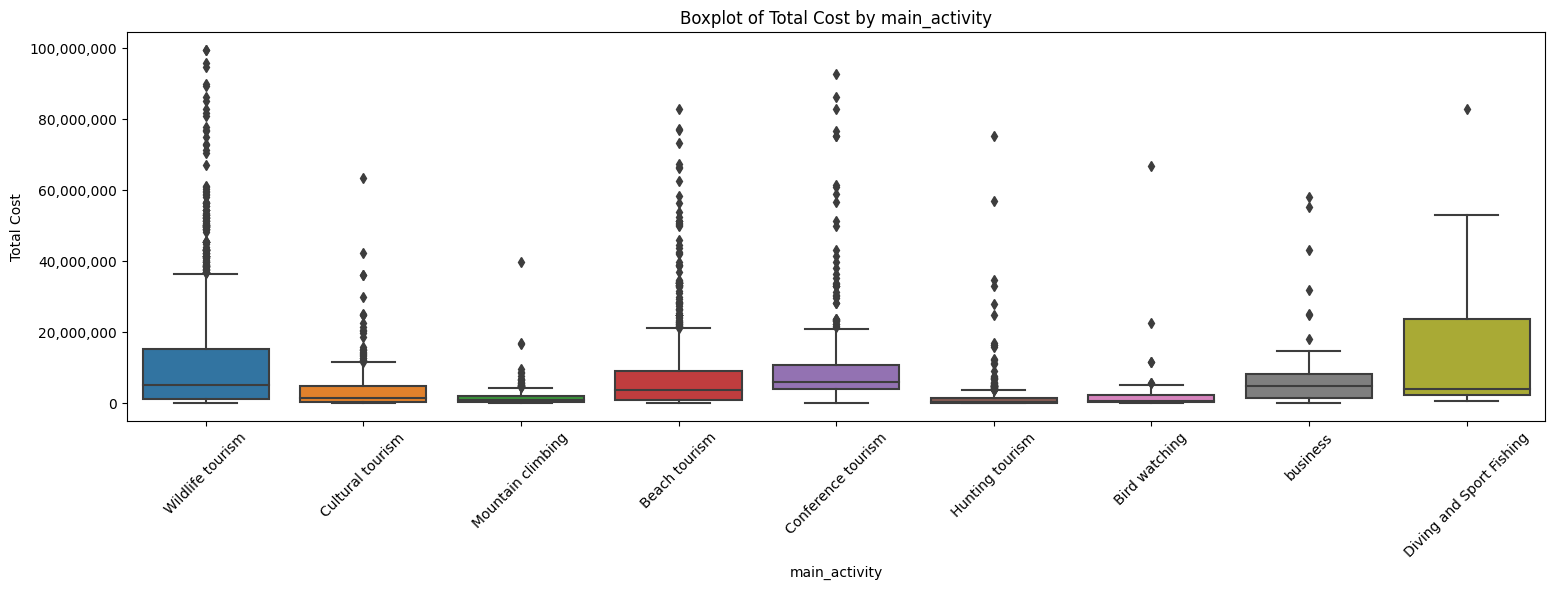

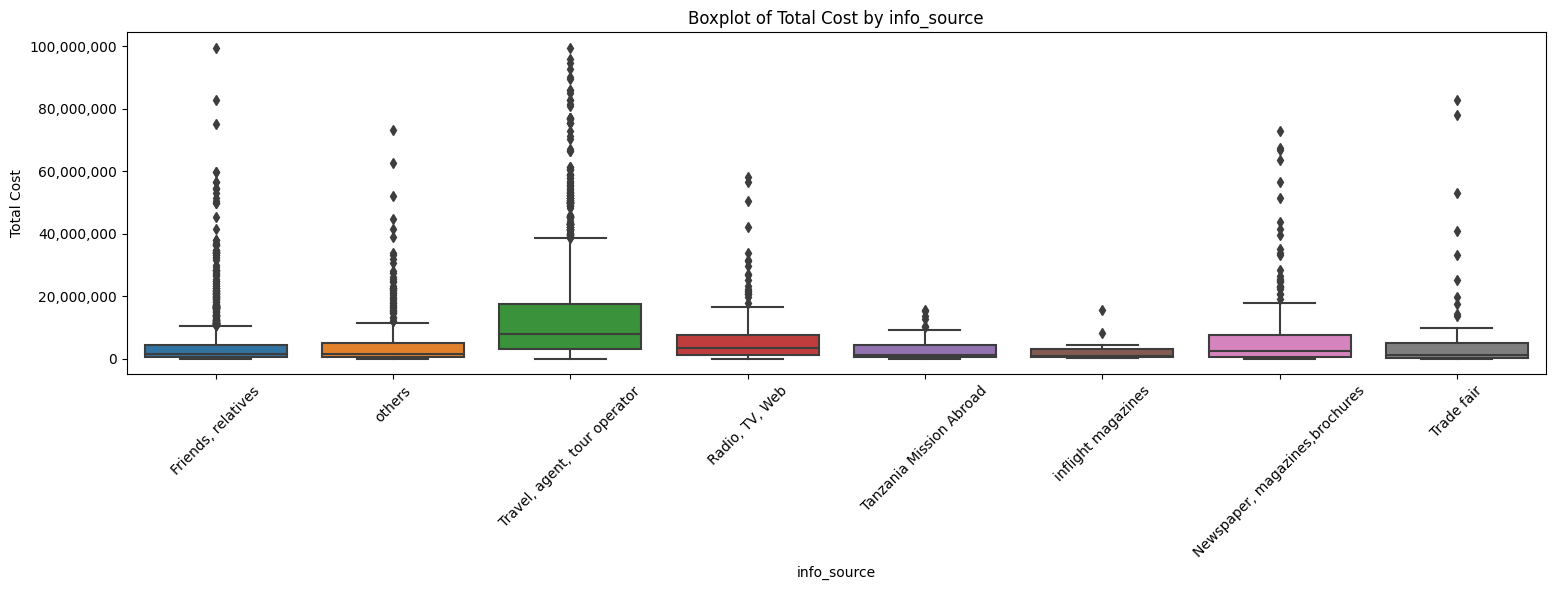

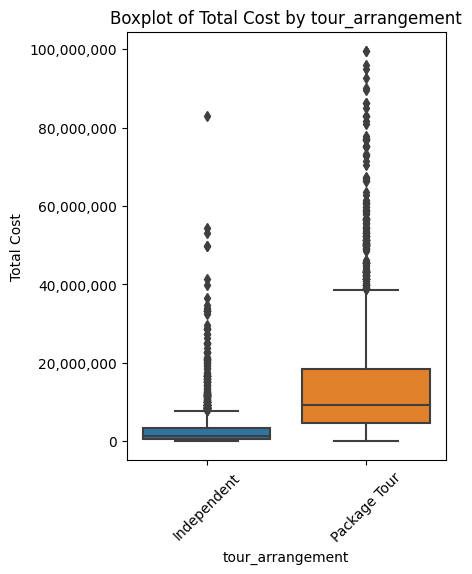

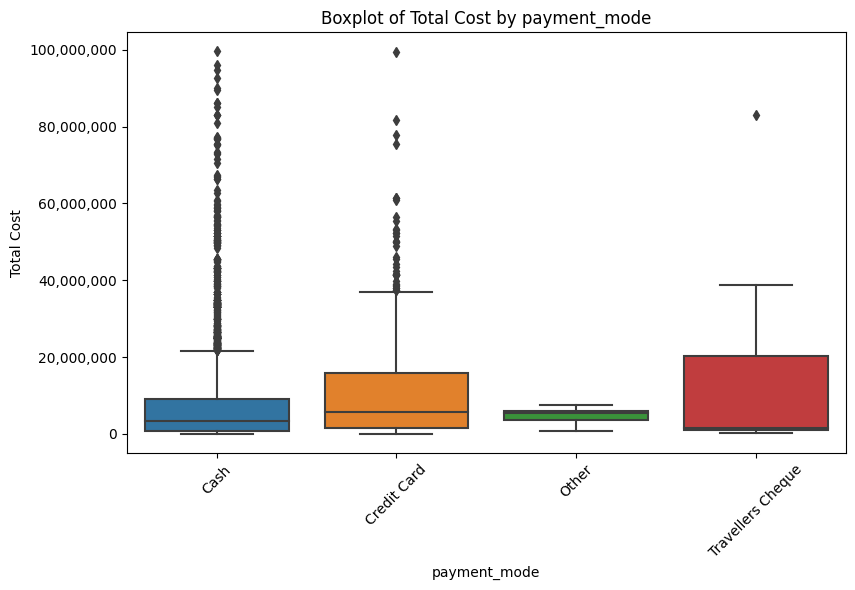

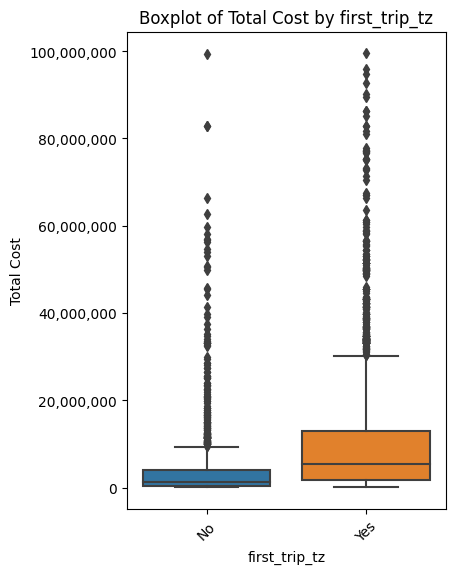

In [87]:
# Relationship between Categorical columns and total_cost

# Iterate through each categorical column and plot separate boxplots
for column in categorical_columns:
    # Create separate boxplots for each column
    unique_values = df[column].nunique()  # Number of unique values in the column
    plt.figure(figsize=(min(15, unique_values * 2), 6))  # Adjust width based on the number of categories
    sns.boxplot(data=df, x=column, y='total_cost')
    plt.title(f'Boxplot of Total Cost by {column}')
    plt.xlabel(column)
    plt.ylabel('Total Cost')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent label overlap
    
    # Use an EngFormatter or StrMethodFormatter for more readable format
    ax = plt.gca()
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    
    plt.show()

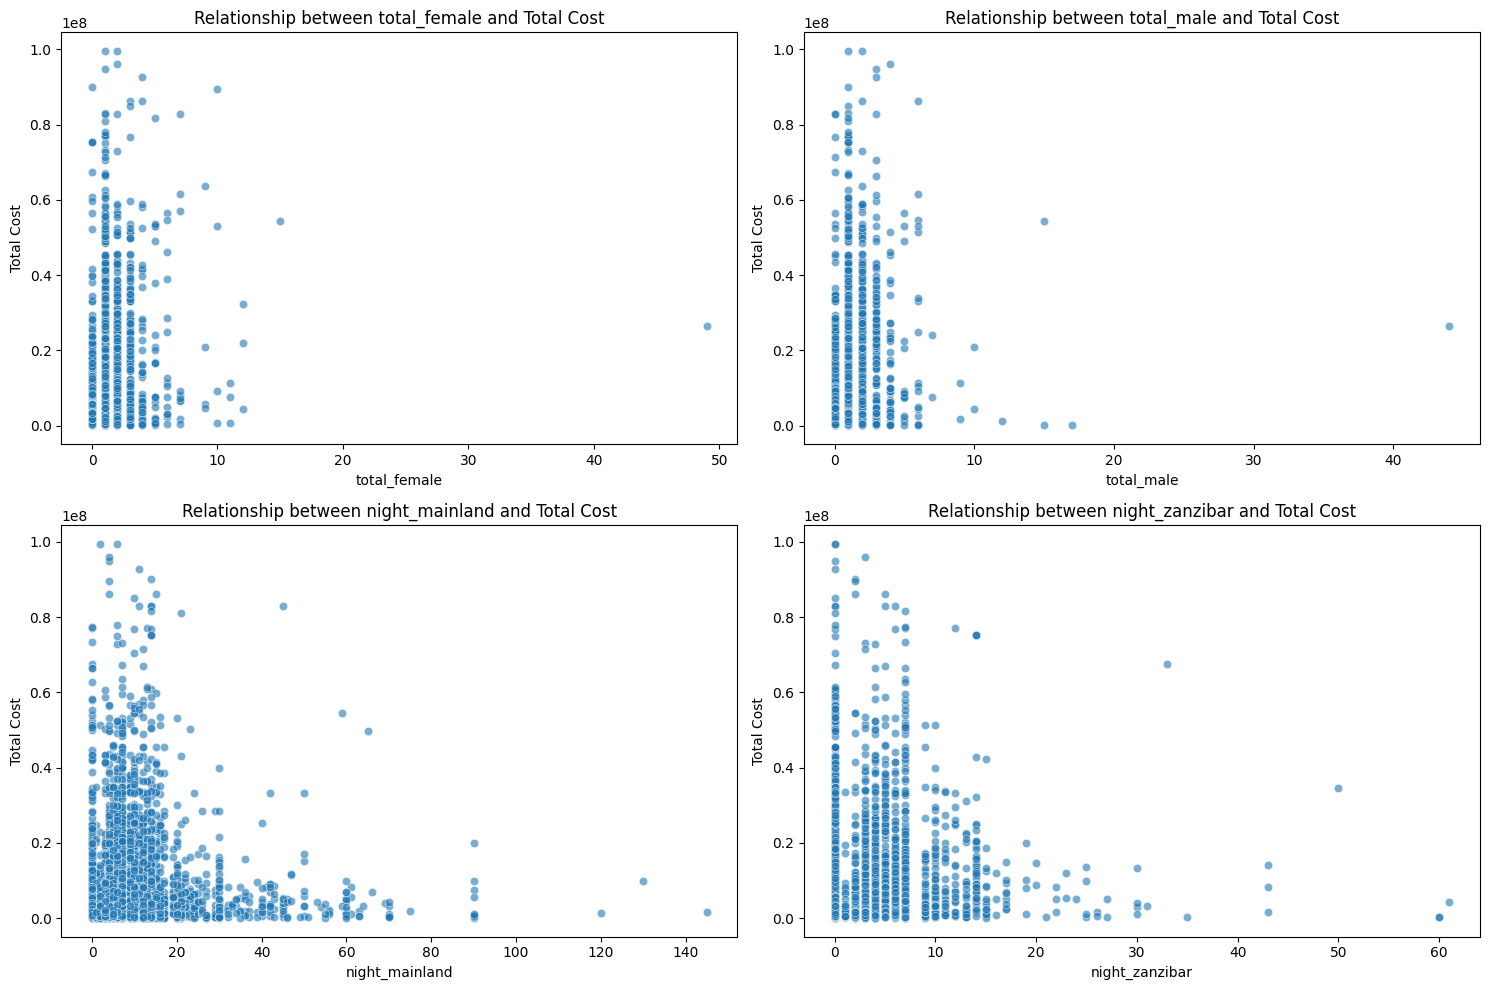

In [88]:
#-----------------------------
# Relationship between Numerical Features and total_cost
#-----------------------------

# List of numerical columns to plot against `total_cost`
numerical_features = ['total_female', 'total_male', 'night_mainland', 'night_zanzibar']

# Create scatterplots for each feature
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df[column], y=df['total_cost'], alpha=0.6)
    plt.title(f'Relationship between {column} and Total Cost')
    plt.xlabel(column)
    plt.ylabel('Total Cost')

plt.tight_layout()
plt.show()

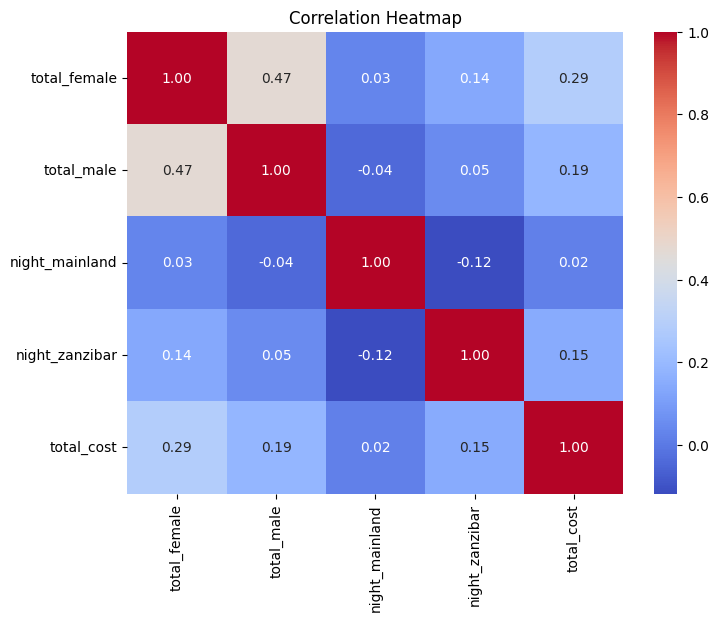

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numerical features
numerical_cols = ['total_female', 'total_male', 'night_mainland', 'night_zanzibar', 'total_cost']

# Compute correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Heatmap')
plt.show()


### Correlation Heatmap Analysis:
Here’s what we can interpret from the heatmap:

1. total_cost Correlations:
  - total_female (0.29):
    - This indicates a weak positive correlation between the number of females in a group and the total cost. This suggests that as the number of females increases, the total cost tends to increase slightly.
  - total_male (0.19):
    - A weak positive correlation is also seen for the number of males and the total cost. This is weaker than the correlation with total_female.
  - night_mainland (0.02):
    - The correlation is very close to zero, meaning that the number of nights spent in mainland Tanzania does not significantly affect the total cost.
  - night_zanzibar (0.15):
    - A weak positive correlation with night_zanzibar suggests that staying more nights in Zanzibar has a minor effect on increasing the total cost.


## Data Cleaning

In [90]:
train_data_cleaned = clean_and_preprocess_data(df)

train_data_cleaned

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost,total_cost_log,total_cost_capped,country_encoded,total_people,total_nights
0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5,13.421880,674602.5,89,2.0,13.0
1,UNITED KINGDOM,25-44,Missing,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5,14.983309,3214906.5,99,1.0,21.0
2,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0,15.013968,3315000.0,99,1.0,32.0
3,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0,15.868384,7790250.0,99,2.0,11.0
4,CHINA,1-24,Missing,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0,14.320822,1657500.0,13,1.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,UAE,45-64,Alone,0.0,1.0,Business,Hunting tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,2.0,0.0,Credit Card,No,No comments,3315000.0,15.013968,3315000.0,95,1.0,2.0
4805,UNITED STATES OF AMERICA,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,11.0,0.0,Cash,Yes,Friendly People,10690875.0,16.184901,10690875.0,100,2.0,11.0
4806,NETHERLANDS,1-24,Missing,1.0,0.0,Leisure and Holidays,Wildlife tourism,others,Independent,No,No,No,No,No,No,No,3.0,7.0,Cash,Yes,Good service,2246636.7,14.624945,2246636.7,64,1.0,10.0
4807,SOUTH AFRICA,25-44,Friends/Relatives,1.0,1.0,Business,Beach tourism,"Travel, agent, tour operator",Independent,Yes,Yes,Yes,No,No,No,No,5.0,0.0,Credit Card,No,Friendly People,1160250.0,13.964147,1160250.0,83,2.0,5.0


In [91]:
# Verify missing values after filling
print("Missing Values After Cleaning:")
print(train_data_cleaned.isnull().sum())

Missing Values After Cleaning:
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
most_impressing          0
total_cost               0
total_cost_log           0
total_cost_capped        0
country_encoded          0
total_people             0
total_nights             0
dtype: int64


In [92]:
# Save the cleaned and processed dataset to a CSV file
train_data_cleaned.to_csv('data/cleaned_Train.csv', index=False)

print("Dataset saved as 'cleaned_Train.csv'")

Dataset saved as 'cleaned_Train.csv'


In [93]:
# Save the processed test dataset to a CSV file
df_test = pd.read_csv('data/Test.csv')

test_data_cleaned = clean_and_preprocess_data(df_test)
test_data_cleaned

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,country_encoded,total_people,total_nights
0,AUSTRALIA,45-64,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,10,3,Cash,Yes,Wildlife,1,2.0,13
1,SOUTH AFRICA,25-44,Friends/Relatives,0.0,4.0,Business,Wildlife tourism,Tanzania Mission Abroad,Package Tour,Yes,Yes,No,No,No,No,No,13,0,Cash,No,"Wonderful Country, Landscape, Nature",70,4.0,13
2,GERMANY,25-44,Friends/Relatives,3.0,0.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,7,14,Cash,No,No comments,26,3.0,21
3,CANADA,24-Jan,Friends/Relatives,2.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,0,4,Cash,Yes,Friendly People,10,2.0,4
4,UNITED KINGDOM,45-64,Friends/Relatives,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,Yes,Yes,Yes,Yes,No,No,No,10,0,Cash,Yes,Friendly People,81,4.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,UNITED STATES OF AMERICA,25-44,Missing,0.0,1.0,Meetings and Conference,Mountain climbing,"Newspaper, magazines,brochures",Independent,No,No,No,No,No,No,No,1,0,Cash,No,Missing,82,1.0,1
1597,ITALY,45-64,Spouse and Children,3.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,No,Yes,Yes,Yes,Yes,No,No,10,5,Other,Yes,Wildlife,37,4.0,15
1598,FINLAND,25-44,Alone,0.0,1.0,Meetings and Conference,Mountain climbing,"Friends, relatives",Independent,No,No,No,No,No,No,No,6,0,Cash,Yes,No comments,24,1.0,6
1599,SOUTH AFRICA,24-Jan,Alone,0.0,1.0,Business,Beach tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,4,0,Cash,Yes,Wildlife,70,1.0,4


In [94]:
print("Missing Values After Cleaning:")
print(test_data_cleaned.isnull().sum())

Missing Values After Cleaning:
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
most_impressing          0
country_encoded          0
total_people             0
total_nights             0
dtype: int64


In [95]:
test_data_cleaned.to_csv('data/cleaned_Test.csv', index=False)

print("Dataset saved as 'cleaned_Test.csv'")

Dataset saved as 'cleaned_Test.csv'
